## Prueba Técnica: Análisis de Sentimientos y Clusterización con NLP

NLP (Procesamiento de Lenguaje Natural, por sus siglas en inglés) es una rama de la inteligencia artificial (IA) que permite a las máquinas entender, interpretar, manipular y generar el lenguaje humano.

Se realizará un análisis sobre el conjunto de datos llamado *evaluación_docente* que contiene comentarios y textos
diversos. Se aplicará las siguientes técnicas NLP:

1. Preprocesamiento de Textos
2. Análisis de Sentimientos
3. Clusterización de Textos

#### Preparación de datos

In [1]:
#importar librerías relacionadas a NLP

import pandas as pd
import numpy as np
import re
from collections import Counter
import unicodedata
import unidecode

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from deep_translator import GoogleTranslator

import spacy
from scipy.sparse import csr_matrix


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alejandra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alejandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alejandra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alejandra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Dirty_Evaluation_Data.csv')  # leer el conjunto de datos

print("Estado de los datos:")
print(df.head(5)) #mostramos las primeras tres filas del conjunto de datos para tener una idea de los valores.

Estado de los datos:
   Id Instructor Grado Académico    Catálogo      Curso  Nº Clase  \
0   1.000096e+09            PREG      PS0301        NaN       NaN   
1   1.000096e+09            PREG      PS0301        NaN    1383.0   
2   1.000096e+09            PREG         NaN  1317080.0    1383.0   
3            NaN            PREG      PS0302   125596.0    1384.0   
4   1.000005e+09            PREG      PS0302   125596.0    1384.0   

                 Nombre Catalogo Modo de Enseñanza Fecha Inicio real  \
0                            NaN        Presencial        2024-01-24   
1  Análisis Descriptivo de Datos        Pcsaielenr               NaN   
2                            NaN        Presencial        2024-01-24   
3     El Objeto de la Psicología        Presencial               NaN   
4     El Objeto de la Psicología        Presencial        2024-01-22   

  Fecha Fin real      Centro de Costos  Nota final por curso  \
0     2024-05-22  Depto. de Psicología                  4.39   
1  

In [3]:
print("Dimensión del conjunto de datos:")
print(df.shape) # el conjunto de datos tiene 8649 filas, 20 columnas

Dimensión del conjunto de datos:
(8649, 20)


In [4]:
print("\nValores faltantes por columna:")
print(df.isnull().sum()) # Contar los valores faltantes por columna


Valores faltantes por columna:
Id Instructor                   825
Grado Académico                 865
Catálogo                        865
Curso                           818
Nº Clase                        811
Nombre Catalogo                 865
Modo de Enseñanza               865
Fecha Inicio real               865
Fecha Fin real                  865
Centro de Costos                865
Nota final por curso            818
Competencia Evaluada            865
Nota competencia por clase      824
Nota final por clase            823
Pregunta                        865
Calificación Pregunta           826
Comentarios                     912
Total Evaluaciones generadas    815
Evaluaciones realizadas         828
% de participación              828
dtype: int64


In [5]:
# Contar los valores únicos de de la columna como 'Modo de Enseñanza' para analizar sus posibles categorías. 
# Se puede encontrar que varias palabras fueron reordenadas bajo una palabra base (anagramas).

print("\nModo de Enseñanza únicos:")
print(df['Modo de Enseñanza'].dropna().unique())


Modo de Enseñanza únicos:
['Presencial' 'Pcsaielenr' 'snliacerPe' 'laPercsnei' 'iPesclnaer'
 'snreaPceil' 'eaPcseriln' 'elasPiernc' 'lnraiePsec' 'rPncalesie'
 'risencPael' 'clPenirsae' 'ranleePcis' 'lsPrcineae' 'elPnacirse'
 'escaienlrP' 'clansrPeei' 'erePnlcsai' 'Pscaeelrni' 'nPlsraeeic'
 'canPresiel' 'Pslcnrieea' 'Psaenceril' 'Palieenrcs' 'lncaiePrse'
 'ceelPiarsn' 'lericnesPa' 'elicnrePsa' 'lsnericaPe' 'inceraelPs'
 'ilcPsnaree' 'elsrPcanei' 'ianleersPc' 'clePsiaren' 'aclPseerin'
 'aePslienrc' 'eescnPlari' 'lcnresieaP' 'eserlcPnai' 'elearcsnPi'
 'snPeelaric' 'ncreslPeai' 'Prseicnela' 'celnaPsier' 'Pnraeiecls'
 'Percienals' 'seacPlneir' 'ePrceinasl' 'ecersaiPln' 'aesecPnril'
 'sacenierPl' 'leniraecPs' 'larecesnPi' 'Peanclsire' 'slcanePrie'
 'eiarescPln' 'elirsaPnec' 'reiPnaselc' 'ierlcPsean' 'nPslerieac'
 'earlnseiPc' 'lePraiecns' 'iePnclsare' 'ePcarenils' 'ciaeenlrsP'
 'riencaPesl' 'racnleePis' 'iePsrlacen' 'reclniasPe' 'elnPasrice'
 'ePnlesacir' 'iceerlPasn' 'iarnePeslc' 'Virtual 

### Preprocesamiento de datos para recuperar items que contienen anagramas

In [6]:
# Elimina los espacios de una columna específica y devuelve las primeras 3 filas

def remove_spaces_from_column(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].str.replace(' ', '', regex=False)
    return dataframe.head(3)

remove_spaces_from_column(df, 'Catálogo')

,Id Instructor,Grado Académico,Catálogo,Curso,Nº Clase,Nombre Catalogo,Modo de Enseñanza,Fecha Inicio real,Fecha Fin real,Centro de Costos,Nota final por curso,Competencia Evaluada,Nota competencia por clase,Nota final por clase,Pregunta,Calificación Pregunta,Comentarios,Total Evaluaciones generadas,Evaluaciones realizadas,% de participación
0,1.000096e+09,PREG,PS0301,NaN,NaN,NaN,Presencial,2024-01-24,2024-05-22,Depto. de Psicología,4.39,NaN,0.0,4.39,Menciona un aspecto a mejorar del desempeño de...,0.0,la practica de los temas,24.0,24.0,100.0
1,1.000096e+09,PREG,PS0301,NaN,1383.0,Análisis Descriptivo de Datos,Pcsaielenr,NaN,NaN,Depto. de Psicología,4.39,Comentarios,0.0,50.00,Menciona un aspecto a mejorar del desempeño de...,0.0,No sé en ocurre ninguna,24.0,24.0,NaN
2,1.000096e+09,PREG,NaN,1317080.0,1383.0,NaN,Presencial,2024-01-24,2024-05-22,Depto. de Psicología,4.39,Comentarios,0.0,4.39,Menciona un aspecto positivo del desempeño de ...,NaN,Su buen sentido del humor a veces facilita la ...,24.0,24.0,100.0


Este apartado tiene como objetivo procesar y limpiar un conjunto de datos relacionados con cursos, completando valores faltantes de diversas columnas basándose en las frecuencias de valores similares en otras filas.

- Limpiar textos eliminando guiones, y tildes, además de convertir el texto a minúsculas para la columna 'Nombre Catalogo' donde es una variable que puede segmentar datos según el estudio.
-  Limpiar y corregir la columna 'Nombre Catalogo' para asegurar que los valores faltantes o distorsionados se completen correctamente basándose en el valor más frecuente en el grupo correspondiente.
- Limpiar textos para eliminar caracteres no deseados, dejando solo letras, números y algunos caracteres permitidos para Grado Académico', 'Modo de Enseñanza', 'Centro de Costos', 'Competencia Evaluada'. Corregir valores distorsionados comparándolos con una lista de palabras de referencia.
- Asegurar que los valores en las columnas Nº Clase y Curso sean correctos y consistentes
- Corregir los valores de la columna Catálogo basándose en el valor más repetido para cada Nombre Catalogo.
- Completar los valores vacíos en las columnas Grado Académico, Modo de Enseñanza y Centro de Costos utilizando el valor más común de cada grupo de Nombre Catalogo.








In [7]:
# Función para limpiar puntos, guiones, tildes y convertir a minúsculas
def clean_points_and_accents(text):
    """
    Limpia puntos, guiones, tildes y convierte el texto a minúsculas.
    """
    if pd.isna(text):
        return ""
    text = unidecode.unidecode(text.lower())  # Convertir a minúsculas y remover tildes
    #text = text.replace(".", "")  # Remover puntos
    text = text.replace("-", "")  # Remover guiones
    text = text.replace(", ", " ")  # Remover guiones
    text = text.replace(",", " ")  # Remover guiones
    return text.strip()

# Función para procesar "Nombre Catalogo" basado en un identificador
def process_nombre_catalogo(df, id_column, catalog_column):
    """
    Procesa la columna `catalog_column` en función de un identificador único `id_column`.
    Limpia datos, llena vacíos, y corrige anagramas basándose en la palabra más frecuente.
    """
    # Limpiar la columna de catálogo
    df[catalog_column] = df[catalog_column].apply(clean_points_and_accents)
    
    # Crear un diccionario para almacenar la palabra más frecuente por identificador
    id_to_most_frequent = {}

    # Identificar la palabra más frecuente para cada valor único en `id_column`
    for id_value in df[id_column].unique():
        subset = df[df[id_column] == id_value][catalog_column].dropna()
        word_counts = Counter(subset)
        
        if word_counts:  # Si hay palabras en el subset
            most_frequent_word = word_counts.most_common(1)[0][0]
            id_to_most_frequent[id_value] = most_frequent_word

    # Función para corregir valores usando la palabra más frecuente y anagramas
    def correct_catalog(row):
        id_value = row[id_column]
        catalog_value = row[catalog_column]
        
        # Palabra más frecuente para este identificador
        most_frequent_word = id_to_most_frequent.get(id_value, "")

        # Si el valor está vacío o es un anagrama, corregir
        if not catalog_value or sorted(catalog_value) == sorted(most_frequent_word):
            return most_frequent_word
        return catalog_value

    # Aplicar corrección fila por fila
    df[catalog_column] = df.apply(correct_catalog, axis=1)
    
    return df

# Aplicar la función a las columnas "Nº Clase" y "Curso"
df = process_nombre_catalogo(df, "Nº Clase", "Nombre Catalogo")
df = process_nombre_catalogo(df, "Curso", "Nombre Catalogo")

In [8]:
columns_to_process = [
    'Grado Académico', 'Modo de Enseñanza', 'Centro de Costos', 'Competencia Evaluada'
]

# Función para limpiar texto (mantener solo letras y números)
def clean_text(text):
    if pd.isna(text):
        return text
    return re.sub(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚñÑ\s.]', '', str(text)).strip()

# Función para corregir valores distorsionados usando comparación de anagramas
def correct_line(line, reference_words):
    if pd.isna(line):
        return line
    clean_line = clean_text(line)
    for ref in reference_words:
        if sorted(clean_line.replace(" ", "").lower()) == sorted(ref.replace(" ", "").lower()):
            return ref
    return line

# Procesar cada columna
for col in columns_to_process:
    # Limpiar la columna
    df[col] = df[col].apply(clean_text)
    
    # Contar valores más comunes en la columna
    counter = Counter(df[col].dropna())
    common_words = [word for word, count in counter.most_common(5)]  # Top 5 valores más comunes
    
    # Corregir valores distorsionados en la columna
    df[col] = df[col].apply(lambda x: correct_line(x, common_words))

In [9]:
# Convertir los valores de 'Nº Clase' a enteros
df['Nº Clase'] = pd.to_numeric(df['Nº Clase'], errors='coerce').fillna(0).astype(int)
# Convertir los valores de 'Curso' a enteros
df['Curso'] = pd.to_numeric(df['Curso'], errors='coerce').fillna(0).astype(int)

# Convertir columnas relevantes a strings
df['Curso'] = df['Curso'].astype(str)
df['Nº Clase'] = df['Nº Clase'].astype(str)


# Filtrar registros válidos por largo de 'Nº Clase' igual a 4
valid_clases = df['Nº Clase'].str.len() == 4
valid_data = df[valid_clases]

In [10]:
# Encontrar el curso más repetido con longitud 6 por cada 'Nº Clase'
curso_por_clase = pd.DataFrame()
curso_repetido_por_clase = (
    valid_data.groupby('Nº Clase')['Curso']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .reset_index(name='Curso más repetido')
)

# Eliminar filas con valores nulos en 'Curso más repetido'
curso_por_clase = curso_repetido_por_clase.dropna()

for _, row  in curso_por_clase.iterrows():
    df['Curso'][df['Nº Clase'] == row[0]] = row[1]
    

In [11]:
# Convertir los valores de 'Nº Clase' y 'Curso' a enteros
df['Nº Clase'] = pd.to_numeric(df['Nº Clase'], errors='coerce').fillna(0).astype(int)
df['Curso'] = pd.to_numeric(df['Curso'], errors='coerce').fillna(0).astype(int)

# Convertir columnas relevantes a strings
df['Curso'] = df['Curso'].astype(str)
df['Nº Clase'] = df['Nº Clase'].astype(str)

# Filtrar registros válidos por largo de 'Nº Clase' igual a 4
valid_clases = df['Nº Clase'].str.len() == 4
valid_data = df[valid_clases]

# Lista de columnas a procesar
columns_to_process = ['Modo de Enseñanza', 'Competencia Evaluada', 'Centro de Costos', 'Nombre Catalogo']

# Aplicar la lógica a cada columna de interés
for column in columns_to_process:
    # Encontrar el valor más repetido por 'Nº Clase'
    column_repeated_by_class = (
        valid_data.groupby('Nº Clase')[column]
        .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
        .reset_index(name=f'{column} más repetido')
    )
    
    print(column_repeated_by_class[column_repeated_by_class['Nº Clase'] == 125612])
    # Eliminar filas con valores nulos
    column_repeated_by_class = column_repeated_by_class.dropna()
    
    # Reemplazar los valores en la columna original con los valores más repetidos
    for _, row in column_repeated_by_class.iterrows():
        df.loc[df['Nº Clase'] == row['Nº Clase'], column] = row[f'{column} más repetido']


Empty DataFrame
Columns: [Nº Clase, Modo de Enseñanza más repetido]
Index: []
Empty DataFrame
Columns: [Nº Clase, Competencia Evaluada más repetido]
Index: []
Empty DataFrame
Columns: [Nº Clase, Centro de Costos más repetido]
Index: []
Empty DataFrame
Columns: [Nº Clase, Nombre Catalogo más repetido]
Index: []


In [12]:
# Filtrar registros válidos donde 'Nombre Catalogo' no sea nulo
valid_catalog_data = df[~df['Nombre Catalogo'].isna()]

# Filtrar registros válidos donde 'Catálogo' empiece con dos letras
valid_catalog_data = valid_catalog_data[
    valid_catalog_data['Catálogo'].str.match(r'^[A-Za-z]{2}', na=False)
]

# Encontrar el valor más repetido para 'Catálogo' basado en 'Nombre Catalogo'
catalog_repeated_by_name = (
    valid_catalog_data.groupby('Nombre Catalogo')['Catálogo']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index(name='Catálogo más repetido')
)

# Reemplazar los valores en la columna 'Catálogo' con los valores más repetidos
for _, row in catalog_repeated_by_name.iterrows():
    df.loc[df['Nombre Catalogo'] == row['Nombre Catalogo'], 'Catálogo'] = row['Catálogo más repetido']


In [13]:
# Reemplazar los valores vacíos de Grado Académico basados en el 'Nombre Catalogo'
for index, row in df[df['Grado Académico'].isna()].iterrows():
    # Buscar otras filas con el mismo Nombre Catalogo y Grado Académico
    similar_rows = df[df['Nombre Catalogo'] == row['Nombre Catalogo']]
    # Reemplazar con el valor más frecuente para el "Grado Académico"
    if not similar_rows['Grado Académico'].isna().all():
        df.at[index, 'Grado Académico'] = similar_rows['Grado Académico'].mode()[0]

# Reemplazar los valores vacíos de Modo de Enseñanza y Centro de Costos de la misma forma
for column in ['Modo de Enseñanza', 'Centro de Costos']:
    for index, row in df[df[column].isna()].iterrows():
        # Buscar otras filas con el mismo Nombre Catalogo
        similar_rows = df[df['Nombre Catalogo'] == row['Nombre Catalogo']]
        # Reemplazar con el valor más frecuente para la columna
        if not similar_rows[column].isna().all():
            df.at[index, column] = similar_rows[column].mode()[0]

In [14]:
df.head(5)

,Id Instructor,Grado Académico,Catálogo,Curso,Nº Clase,Nombre Catalogo,Modo de Enseñanza,Fecha Inicio real,Fecha Fin real,Centro de Costos,Nota final por curso,Competencia Evaluada,Nota competencia por clase,Nota final por clase,Pregunta,Calificación Pregunta,Comentarios,Total Evaluaciones generadas,Evaluaciones realizadas,% de participación
0,1.000096e+09,PREG,MU0717,0,0,,Presencial,2024-01-24,2024-05-22,Depto. de Psicología,4.39,NaN,0.0,4.39,Menciona un aspecto a mejorar del desempeño de...,0.0,la practica de los temas,24.0,24.0,100.0
1,1.000096e+09,PREG,PS0301,125595,1383,analisis descriptivo de datos,Presencial,NaN,NaN,Depto. de Psicología,4.39,Comentarios,0.0,50.00,Menciona un aspecto a mejorar del desempeño de...,0.0,No sé en ocurre ninguna,24.0,24.0,NaN
2,1.000096e+09,PREG,PS0301,125595,1383,analisis descriptivo de datos,Presencial,2024-01-24,2024-05-22,Depto. de Psicología,4.39,Comentarios,0.0,4.39,Menciona un aspecto positivo del desempeño de ...,NaN,Su buen sentido del humor a veces facilita la ...,24.0,24.0,100.0
3,NaN,PREG,PS0302,125596,1384,el objeto de la psicologia,Presencial,NaN,2024-05-20,Depto. de Psicología,4.57,Comentarios,0.0,4.57,Menciona un aspecto a mejorar del desempeño de...,0.0,retroalimentar al final de la clase,NaN,22.0,NaN
4,1.000005e+09,PREG,PS0302,125596,1384,el objeto de la psicologia,Presencial,2024-01-22,2024-05-20,Depto. de Psicología,4.57,Comentarios,0.0,4.57,tjloomd e car rum lerausuca ee nf eeanepdMen ...,0.0,Podría evaluar la forma de dictar la clase par...,22.0,22.0,100.0


La lógica implementada en el algoritmo muestra un enfoque integral al abordar diversas posibilidades y reglas para la corrección de datos, lo que facilita su adaptación en el dashboard. Sobretodo para las variables categóricas.

Una **mejora** clave sería integrar un modelo lingüístico que relacione las palabras del diccionario español para identificar coincidencias semánticas, asegurando que las correcciones sean más exactas incluso cuando las comparaciones basadas en la frecuencia no sean efectivas. Además, el algoritmo podría optimizarse para reducir el tiempo de procesamiento, aumentando su eficiencia en entornos con datos más grandes.

### Preprocesamiento para los comentarios

#### Cargar diccionario de español

A partir de las palabras en español solo del corpus de nltk son menos de 3000 palabras, se optó por incrementar el diccionario bajo esta fuente: https://github.com/lorenbrichter/Words/blob/master/Words/es.txt

In [15]:
# Cargar las palabras del corpus en un conjunto
spanish_words = set(w.lower() for w in nltk.corpus.cess_esp.words())

# Cargar el diccionario del archivo de texto
with open('es.txt', 'r', encoding='utf-8') as file:
    additional_words = set(word.strip().lower() for word in file)

# Encontrar las palabras nuevas que no están en spanish_words
new_words = additional_words - spanish_words

# Agregar las nuevas palabras al conjunto existente
spanish_words.update(new_words)

print(f"Se agregaron {len(new_words)} nuevas palabras.")

Se agregaron 622789 nuevas palabras.


Para abordar el análisis de sentimientos, se lleva a cabo un preprocesamiento de los **comentarios** que incluye la eliminación de stop words, la unificación de palabras lematizadas, la conversión a minúsculas, así como la corrección de acentos y caracteres especiales.

Al igual que las columnas previamente analizadas, los comentarios pueden contener frases que podrían ser anagramas o estar desordenadas. Sin embargo, en el caso de los comentarios, aplicar un enfoque basado en predicción lingüística podría llevar a interpretaciones erróneas, distorsionando así el mensaje original del usuario. Además, la efectividad de utilizar la lógica de frecuencias en este contexto es limitada, dado que los comentarios suelen ser muy variados y específicos.

In [16]:
# Cargar las stop words en español
stop_words = set(stopwords.words('spanish'))

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Definir la función de limpieza
def clean_comment(comment):
    if not isinstance(comment, str):
        return ''
    
    # Convertir a minúsculas
    comment = comment.lower()
    
    # Eliminar acentos
    comment = ''.join((c for c in unicodedata.normalize('NFD', comment) if unicodedata.category(c) != 'Mn'))
    
    # Eliminar caracteres especiales, comas y guiones
    comment = re.sub(r'[^a-zñáéíóúü\s]', '', comment)  # Solo letras y espacios
    comment = comment.replace(',', '').replace('-', '').strip()
    
    # Filtrar stop words usando nltk
    words = comment.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    # Lematización: convertir las palabras a su forma base
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Unir las palabras lematizadas de nuevo en una cadena
    return ' '.join(lemmatized_words)


# Función para verificar si un comentario tiene palabras reales
def is_real_comment(comment, spanish_words):
    if not isinstance(comment, str):  # Asegurarse de que el comentario es una cadena
        return False
    
    words = comment.split()
    if not words:  # Manejar comentarios vacíos
        return False
    
    real_word_count = sum(1 for word in words if word.lower() in spanish_words)
    real_word_ratio = real_word_count / len(words)
    
    return real_word_ratio > 0.5  # Umbral: más del 50% de palabras reales

In [17]:
# Limpiar los comentarios
df['Comentarios_Limpios'] = df['Comentarios'].apply(clean_comment)

# Identificar comentarios reales
df['Is_Real_Comment'] = df['Comentarios_Limpios'].apply(lambda x: is_real_comment(x, spanish_words))

# Filtrar comentarios reales
real_comments = df[df['Is_Real_Comment'] == True]

# Rellenar valores faltantes con cadenas vacías
real_comments['Comentarios_Limpios'] = real_comments['Comentarios_Limpios'].fillna('')

In [18]:
real_comments.shape # nuevo tamaño del dataset

(6398, 22)

Otra **mejora** clave para el análisis de NLP en un contexto donde el corpus es en español es la traducción del texto. Dado que muchos modelos están entrenados con datos en inglés, esto puede generar imprecisiones en los análisis. Se sugiere utilizar herramientas como la librería de Google Translator para traducir el texto, lo que permitiría que las detecciones de sentimientos sean más precisas y cercanas al lenguaje humano. 

Para este ejercicio, la traducción no se implementó debido a la demora que implican las peticiones hacia la API. Además, realizar cualquier cambio en este sentido tomaría más tiempo del previsto. Para optimizar estas peticiones, se podría explorar el uso de computadoras HCP (High-Performance Computing), que permitirían procesar las solicitudes de manera más eficiente y rápida.

In [19]:
'''
# Inicializar lista para almacenar las traducciones
translated_comments = []
total_comments = len(real_comments)  # Número total de comentarios

# Traducir todos los comentarios y mostrar el progreso
for i, text in enumerate(real_comments['Comentarios_Limpios']):
    if text:  # Verificar si el texto no está vacío
        translation = GoogleTranslator(source='auto', target='en').translate(text)
        translated_comments.append(translation)
    else:
        translated_comments.append('')
    
    # Imprimir el progreso
    print(f"Progreso: {i+1}/{total_comments} comentarios traducidos")

# Guardar las traducciones en una nueva columna
real_comments['Comentarios_Traducidos'] = translated_comments
'''

'\n# Inicializar lista para almacenar las traducciones\ntranslated_comments = []\ntotal_comments = len(real_comments)  # Número total de comentarios\n\n# Traducir todos los comentarios y mostrar el progreso\nfor i, text in enumerate(real_comments[\'Comentarios_Limpios\']):\n    if text:  # Verificar si el texto no está vacío\n        translation = GoogleTranslator(source=\'auto\', target=\'en\').translate(text)\n        translated_comments.append(translation)\n    else:\n        translated_comments.append(\'\')\n    \n    # Imprimir el progreso\n    print(f"Progreso: {i+1}/{total_comments} comentarios traducidos")\n\n# Guardar las traducciones en una nueva columna\nreal_comments[\'Comentarios_Traducidos\'] = translated_comments\n'

### Análisis de sentimientos

En esta prueba técnica se mostrará las comparaciones de dos modelos de análisis de sentimiento como TextBlob y VADER.

#### Análsis de sentimiento bajo el modelo TextBlob

TextBlob utiliza un enfoque basado en diccionarios para evaluar la polaridad y subjetividad del texto.

*Funcionamiento de TextBlob en el Análisis de Sentimiento*

##### 1. **Polaridad** y **Subjetividad**

TextBlob calcula dos valores clave para determinar el sentimiento de un texto:

- **Polaridad**: Un valor numérico entre -1 y 1, donde:
  - **-1** indica un sentimiento negativo.
  - **0** indica un sentimiento neutral.
  - **1** indica un sentimiento positivo.

- **Subjetividad**: Un valor entre 0 y 1, donde:
  - **0** indica que el texto es objetivo (hechos).
  - **1** indica que el texto es subjetivo (opiniones).

  Fuente: 
  - TextBlob: A Simple Natural Language Processing (NLP) Library for Python. (https://textblob.readthedocs.io/en/dev/)


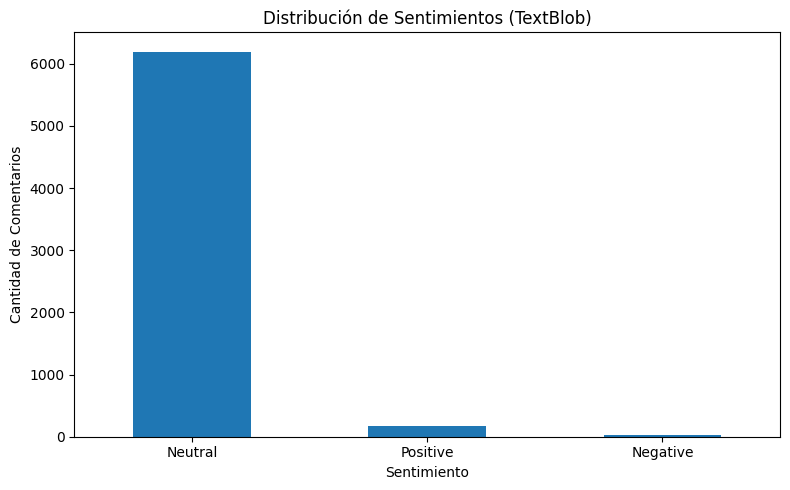

In [20]:
def textblob_sentiment(comment):
    if not isinstance(comment, str):  # Verifica si el comentario es una cadena de texto
        return "Neutral"  # Si no es un texto, asigna el sentimiento como "Neutral"
    analysis = TextBlob(comment)  # Analiza el comentario con TextBlob
    # Determina la categoría del sentimiento según la polaridad
    if analysis.sentiment.polarity > 0.1: 
        return "Positive"
    elif analysis.sentiment.polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Aplica el análisis de sentimiento a la columna "Comentarios_Limpios"
real_comments['TextBlob_Sentiment'] = real_comments['Comentarios_Limpios'].apply(textblob_sentiment)

# Resume la distribución de los sentimientos en los comentarios
sentiment_summary = real_comments['TextBlob_Sentiment'].value_counts()

# Grafica la distribución de sentimientos
plt.figure(figsize=(8, 5))
sentiment_summary.plot(kind='bar')
plt.title('Distribución de Sentimientos (TextBlob)')
plt.xlabel('Sentimiento') 
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

# Muestra el resumen de la distribución de sentimientos en formato de tabla
sentiment_summary_df = sentiment_summary.reset_index()  # Reinicia el índice para crear un DataFrame
sentiment_summary_df.columns = ['Sentimiento', 'Cantidad']  # Renombra las columnas para mayor claridad

#### Análisis de sentimiento bajo el modelo VADER

VADER es una herramienta basada en reglas y léxicos diseñada para el análisis de sentimiento. Su característica distintiva es su capacidad para capturar tanto el contexto léxico como el contexto relacional de palabras en un texto, utilizando:

- Un léxico con más de 7,500 palabras y frases anotadas con sus respectivos puntajes de sentimiento.
- Modificadores contextuales (como adverbios e intensidad).
- Manejo de expresiones estilizadas (como uso excesivo de signos de exclamación y mayúsculas).

El puntaje compuesto (\( C \)) es una suma normalizada de las puntuaciones de sentimiento de las palabras individuales (\( s \)) en el texto:

\[C = \frac{\sum_{i=1}^n s_i}{\sqrt{\sum_{i=1}^n s_i^2 + \alpha}}\]

Donde:
- \( s_i \) es el puntaje de sentimiento de la palabra \( i \), que se extrae del léxico de VADER.
- \( n \) es el número total de palabras del texto.
- \( \alpha \) es un factor de ajuste para evitar que valores extremos dominen el cálculo (por defecto, \(\alpha = 15\)).

El puntaje compuesto está en el rango \([-1, 1]\), donde:
- Valores positivos (\( > 0.05 \)) indican sentimiento positivo.
- Valores negativos (\( < -0.05 \)) indican sentimiento negativo.
- Valores cercanos a cero (\( -0.05 \leq C \leq 0.05 \)) indican neutralidad.


Fuente: https://github.com/cjhutto/vaderSentiment


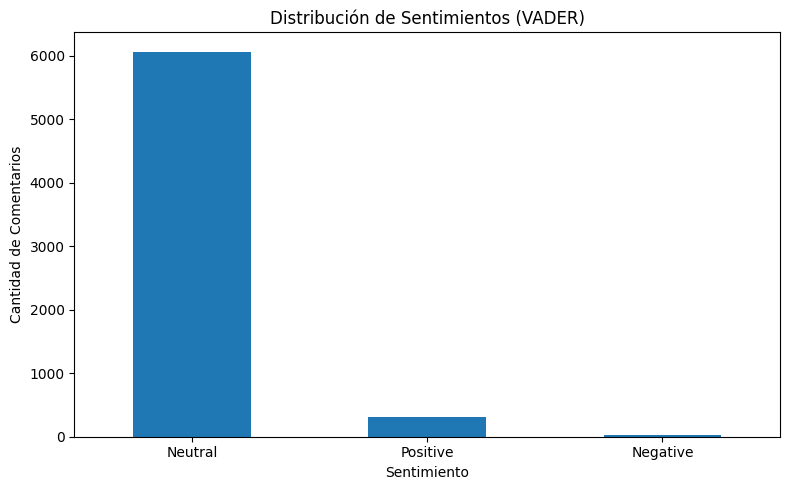

In [21]:
# Inicializar el analizador de sentimientos VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Función para analizar sentimientos usando VADER
def vader_sentiment(comment):
    if not isinstance(comment, str):  # Asegurarse de que el comentario sea una cadena
        return "Neutral"
    scores = vader_analyzer.polarity_scores(comment)
    # Determinar la categoría de sentimiento basada en el puntaje compuesto
    if scores['compound'] > 0.05:
        return "Positive"
    elif scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Aplicar el análisis de sentimientos de VADER a la columna "Comentarios"
real_comments['VADER_Sentiment'] = real_comments['Comentarios_Limpios'].apply(vader_sentiment)

# Resumir la distribución de sentimientos
vader_sentiment_summary = real_comments['VADER_Sentiment'].value_counts()

# Graficar la distribución de sentimientos
plt.figure(figsize=(8, 5))
vader_sentiment_summary.plot(kind='bar')
plt.title('Distribución de Sentimientos (VADER)')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Mostrar el resumen de sentimientos en formato de tabla
vader_sentiment_summary_df = vader_sentiment_summary.reset_index()
vader_sentiment_summary_df.columns = ['Sentimiento', 'Cantidad']

En la investigación de otros modelos de análisis, está un modelo basado en rating del 1 al 5, que podría acercar a otra clasificación más allá de 3 posibilidades.

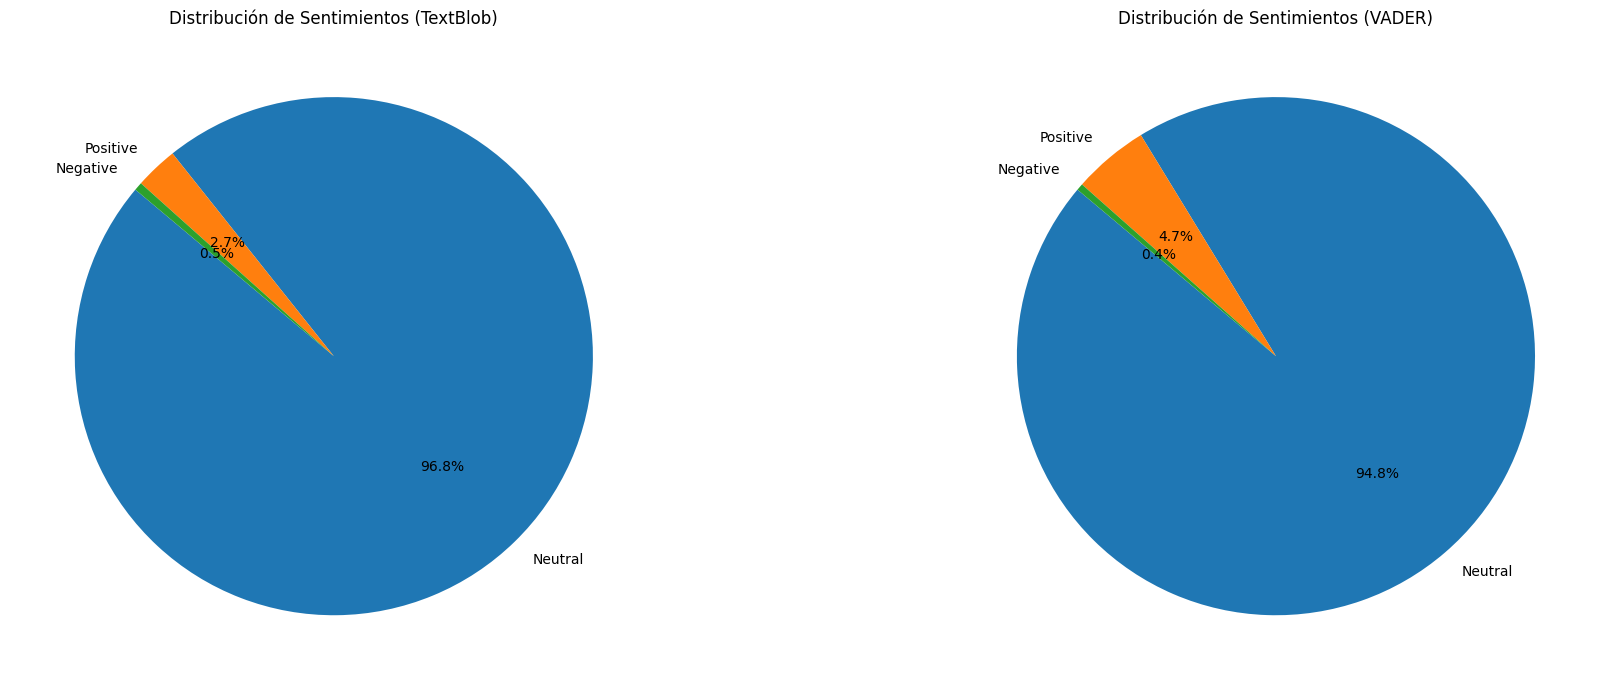

In [22]:
textblob_counts = real_comments['TextBlob_Sentiment'].value_counts()
vader_counts = real_comments['VADER_Sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(21, 7))

# TextBlob sentiment pie chart
axes[0].pie(textblob_counts, labels=textblob_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribución de Sentimientos (TextBlob)')

# VADER sentiment pie chart
axes[1].pie(vader_counts, labels=vader_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribución de Sentimientos (VADER)')


# Graficar ambos modelos
plt.tight_layout()
plt.show()

VADER está diseñado para analizar sentimientos en redes sociales y texto informal, lo que lo hace más sensible a elementos como emojis, puntuación, mayúsculas y expresiones coloquiales que reflejan emociones intensas. En contraste, TextBlob sigue un enfoque estadístico más general, lo que puede limitar su capacidad para captar matices emocionales. Esta sensibilidad de VADER puede llevarlo a detectar más comentarios positivos, especialmente en textos informales, aunque también corre el riesgo de sobrestimar la positividad en ciertos casos.

Por otro lado, consideré importante para el contexto de la base de datos vectorizar los comentarios, calcular la matriz de similitud y usar clustering debio a que mejora el análisis porque:

- Los embeddings promedio crean una representación compacta de cada comentario que conserva información contextual, lo cual es crucial para detectar similitudes entre textos.
- La matriz de similitud coseno mide qué tan similares son los comentarios entre sí, basándose en la dirección de sus embeddings en el espacio vectorial.
- Utilizar la matriz de similitud como base para KMeans mejora la agrupación, ya que este enfoque considera las relaciones entre todos los datos en lugar de solo su representación directa.

Silhouette Score: 0.342


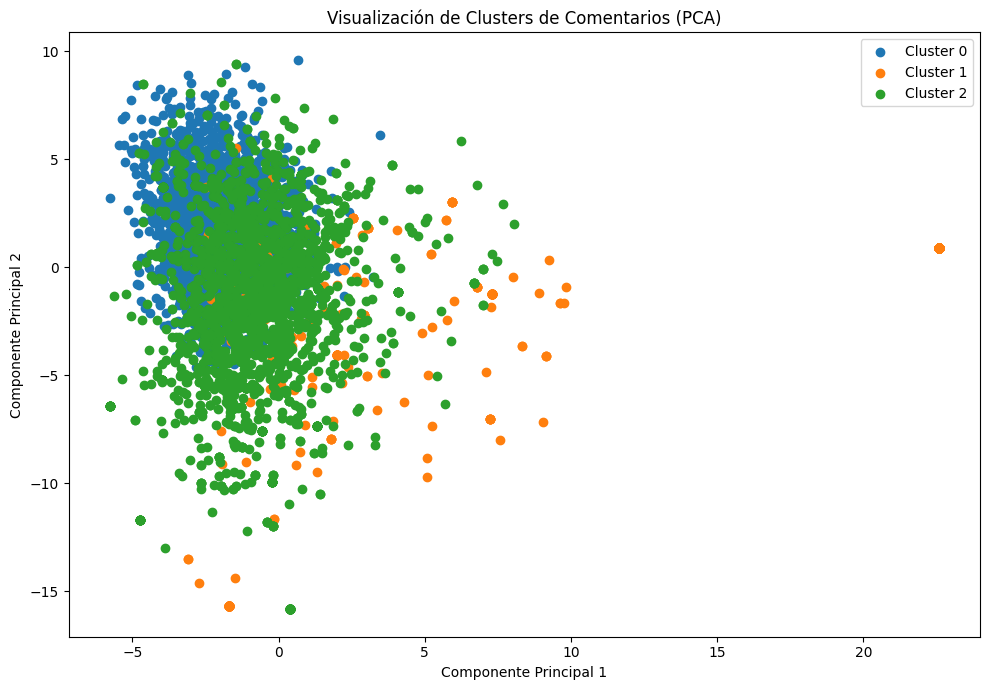

In [23]:
# Cargar el modelo de Spacy en español
nlp = spacy.load('es_core_news_sm')

# Función para obtener los embeddings promedio de un comentario
def get_word_embeddings(text):
    doc = nlp(text)
    word_embeddings = np.mean([token.vector for token in doc if token.has_vector], axis=0)
    return word_embeddings

# Crear la matriz de embeddings para todos los comentarios
comments = real_comments['Comentarios_Limpios'].dropna().astype(str)
embeddings = np.array([get_word_embeddings(comment) for comment in comments])

# Convertir la matriz de embeddings en una matriz dispersa
embeddings_sparse = csr_matrix(embeddings)

# Calcular la matriz de similitud coseno con la matriz dispersa
cosine_sim_matrix = cosine_similarity(embeddings_sparse)

# Clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(cosine_sim_matrix)

# Evaluar el clustering con el Silhouette Score
silhouette_avg = silhouette_score(cosine_sim_matrix, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Realizar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embeddings)

# Añadir las componentes principales de PCA al DataFrame
real_comments['PCA_1'] = reduced_data[:, 0]  # Componente principal 1
real_comments['PCA_2'] = reduced_data[:, 1]  # Componente principal 2

# Añadir las etiquetas de los clusters al DataFrame
real_comments['Cluster'] = kmeans_labels

# Visualización de los clusters con PCA
plt.figure(figsize=(10, 7))
for cluster in set(kmeans_labels):
    cluster_points = reduced_data[kmeans_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Visualización de Clusters de Comentarios (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.tight_layout()
plt.show()

# Ahora los valores de PCA y las etiquetas de clusters están disponibles en el DataFrame 'real_comments'.
# Puedes exportar este DataFrame a un archivo CSV para cargarlo en Power BI.
real_comments.to_csv('real_comments_with_pca_and_clusters.csv', sep=";", decimal=",", index=False)


Basado en Elbow se sugiere 3 clusters. Un puntaje Silhouette de 0.342 puede ser aceptable para el conjunto de datos. Con ajustes al modelo de embeddings, al número de clusters y al preprocesamiento, se podría mejorar significativamente.

Fuentes: https://onlinelibrary.wiley.com/doi/10.1155/2021/7955637